In [8]:
import os
import glob
import numpy as np
import pandas as pd
import configparser
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.interpolate import griddata
from astropy.modeling.models import Lorentz1D
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [9]:
def read_file(path,name,obstime):
    f = open(path+name,'rb')
    xx = f.read()
    f.close()
    
    septrum = np.frombuffer(xx,np.float32)
    septrum = np.sum( septrum.reshape(obstime,int(len(septrum)/obstime)),axis=0 )/obstime
    
    fig = plt.figure(figsize=(14,9))
    plt.plot(septrum)
    plt.show()
    
    return septrum

def read_pathfile(pathname,obstime):
    f = open(pathname,'rb')
    xx = f.read()
    f.close()
    
    septrum = np.frombuffer(xx,np.float32)
    septrum = np.sum( septrum.reshape(obstime,int(len(septrum)/obstime)),axis=0 )/obstime
    
    #fig = plt.figure(figsize=(14,9))
    #plt.plot(septrum)
    #plt.show()
    
    return septrum


def grid_data(path,npoint,obstime,bl):
    txt_files = glob.glob(os.path.join(path, "*.txt"))
    septrum_matrix = []
    for i in txt_files:
        temp_array = read_pathfile(i,obstime)
        septrum_matrix.append(temp_array - bl)
    return septrum_matrix

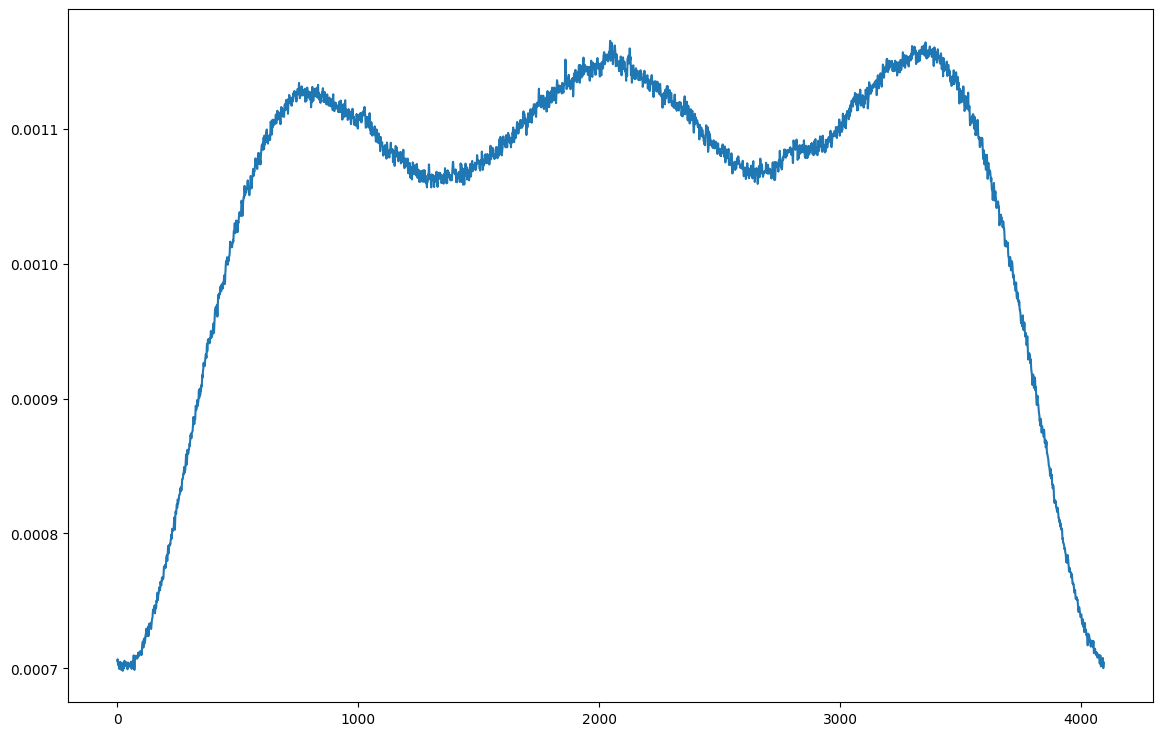

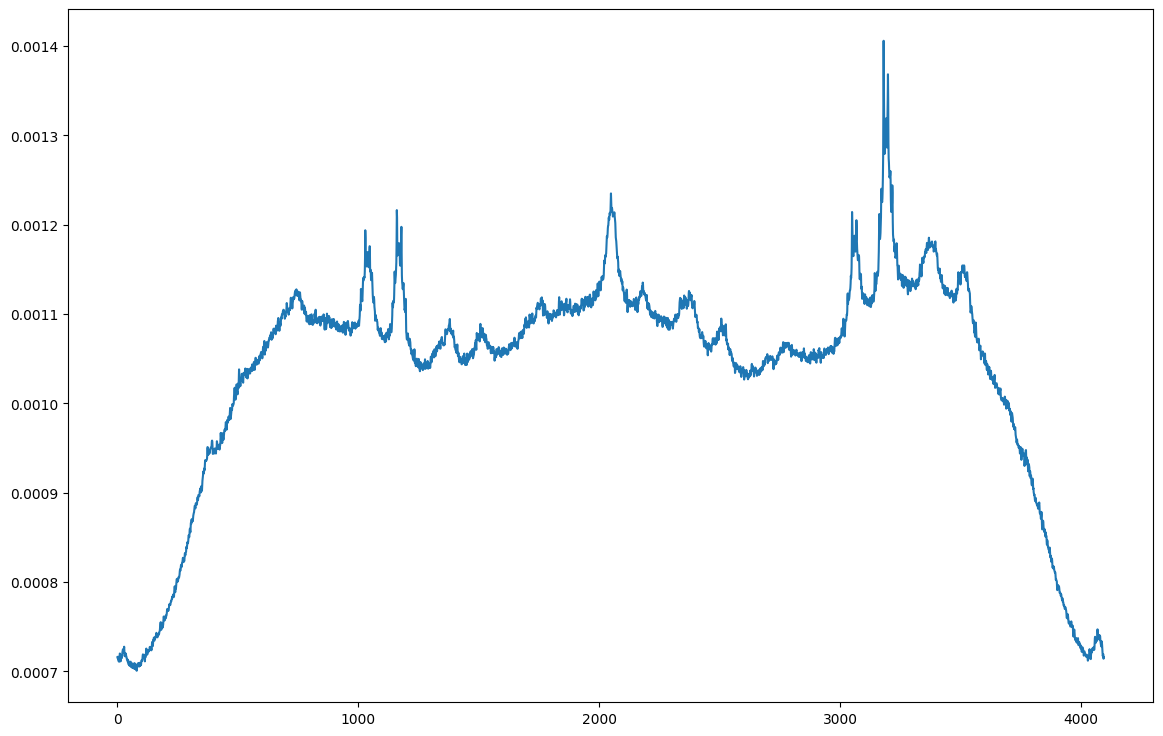

In [10]:
# baseline

sdr1_bl = read_file('/home/jiomer/Documents/observation/data/single/','2023-04-08-18:39:49_SDR1-bl.txt',60)
sdr2_bl = read_file('/home/jiomer/Documents/observation/data/single/','2023-04-08-18:39:49_SDR2-bl.txt',60)


In [11]:
config = configparser.ConfigParser()
config.read('/home/jiomer/Documents/observation/data/single/ini/2023-04-08_SDR_single_point.ini')

# get all sections
sections = config.sections()
print(sections)

print("\n")

# get a section's all options
options = config.options(sections[0])
print(options)

print("\n")

# get a section's option value
#value = config.get(sections[0],options[0])
#print(value)

['SDR1-bl_17:18:47', 'SDR2-bl_17:18:47', 'SDR1-bl_17:23:15', 'SDR2-bl_17:23:15', 'SDR1-bl_17:27:32', 'SDR2-bl_17:27:32', 'SDR1-data_17:37:21', 'SDR2-data_17:37:21', 'SDR1-data_17:50:06', 'SDR2-data_17:50:06', 'SDR1-data_18:00:22', 'SDR2-data_18:00:22', 'SDR1-data_18:06:45', 'SDR2-data_18:06:45', 'SDR1-data_18:12:13', 'SDR2-data_18:12:13', 'SDR1-data_18:24:24', 'SDR2-data_18:24:24', 'SDR1-bl_18:38:27', 'SDR2-bl_18:38:27', 'SDR1-data_18:44:37', 'SDR2-data_18:44:37', 'SDR1-data_18:48:59', 'SDR2-data_18:48:59']


['center_freq', 'sample_rate', 'gain', 'obslength', 'fftsize', 'data_path', 'baseline_filename', 'observation_mode', 'observation_time', 'coord_format', 'coords1', 'coords2']




In [12]:
folder_path = "/home/jiomer/Documents/observation/data/single/"
txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
print(txt_files)

['/home/jiomer/Documents/observation/data/single/2023-04-08-17:24:51_SDR1-bl.txt', '/home/jiomer/Documents/observation/data/single/2023-04-08-18:39:49_SDR1-bl.txt', '/home/jiomer/Documents/observation/data/single/2023-04-08-17:39:26_SDR2-data.txt', '/home/jiomer/Documents/observation/data/single/2023-04-08-18:47:01_SDR1-data.txt', '/home/jiomer/Documents/observation/data/single/2023-04-08-17:55:28_SDR1-data.txt', '/home/jiomer/Documents/observation/data/single/2023-04-08-17:19:48_SDR2-bl.txt', '/home/jiomer/Documents/observation/data/single/2023-04-08-18:14:22_SDR1-data.txt', '/home/jiomer/Documents/observation/data/single/2023-04-08-17:28:17_SDR1-bl.txt', '/home/jiomer/Documents/observation/data/single/2023-04-08-17:24:51_SDR2-bl.txt', '/home/jiomer/Documents/observation/data/single/2023-04-08-17:55:28_SDR2-data.txt', '/home/jiomer/Documents/observation/data/single/2023-04-08-18:26:11_SDR1-data.txt', '/home/jiomer/Documents/observation/data/single/2023-04-08-18:35:02_SDR2-bl.txt', '/h

In [13]:
# grid data process 3x3

In [14]:
config = configparser.ConfigParser()
config.read('/home/jiomer/Documents/observation/data/grid/ini/2023-04-08_SDR_grid_points.ini')

# get all section
sections = config.sections()
print(sections)

print("\n")

# get a section's all options
options = config.options(sections[0])
print(options)

['SDR1-data_116:36:01', 'SDR2-data_116:36:01', 'SDR1-data_216:36:01', 'SDR2-data_216:36:01', 'SDR1-data_316:36:01', 'SDR2-data_316:36:01', 'SDR1-data_416:36:01', 'SDR2-data_416:36:01', 'SDR1-data_516:36:01', 'SDR2-data_516:36:01', 'SDR1-data_616:36:01', 'SDR2-data_616:36:01', 'SDR1-data_716:36:01', 'SDR2-data_716:36:01', 'SDR1-data_816:36:01', 'SDR2-data_816:36:01', 'SDR1-data_916:36:01', 'SDR2-data_916:36:01', 'SDR1-data_116:56:33', 'SDR2-data_116:56:33', 'SDR1-data_216:56:33', 'SDR2-data_216:56:33', 'SDR1-data_316:56:33', 'SDR2-data_316:56:33', 'SDR1-data_416:56:33', 'SDR2-data_416:56:33', 'SDR1-data_516:56:33', 'SDR2-data_516:56:33', 'SDR1-data_616:56:33', 'SDR2-data_616:56:33', 'SDR1-data_716:56:33', 'SDR2-data_716:56:33', 'SDR1-data_816:56:33', 'SDR2-data_816:56:33', 'SDR1-data_916:56:33', 'SDR2-data_916:56:33', 'SDR1-data_1016:56:33', 'SDR2-data_1016:56:33', 'SDR1-data_1116:56:33', 'SDR2-data_1116:56:33', 'SDR1-data_1216:56:33', 'SDR2-data_1216:56:33', 'SDR1-data_1316:56:33', 'SD

In [15]:
sdr1_ra = []
sdr1_dec = []
sdr2_ra = []
sdr2_dec = []
for i in range(18):
    if sections[i][0:4] == 'SDR1':
        temp_ra = config.get(sections[i],options[-2])
        temp_dec = config.get(sections[i],options[-1])
        temp_deg = SkyCoord(ra=temp_ra,dec=temp_dec)
        sdr1_ra.append(temp_deg.ra.value)
        sdr1_dec.append(temp_deg.dec.value)
    else:
        temp_ra = config.get(sections[i],options[-2])
        temp_dec = config.get(sections[i],options[-1])
        temp_deg = SkyCoord(ra=temp_ra,dec=temp_dec)
        sdr2_ra.append(temp_deg.ra.value)
        sdr2_dec.append(temp_deg.dec.value)

obs_time = int(config.get(sections[0],options[3]))
sdr1_grid9 = grid_data('/home/jiomer/Documents/observation/data/grid/grid9/sdr1/',9,obs_time,sdr1_bl)
sdr2_grid9 = grid_data('/home/jiomer/Documents/observation/data/grid/grid9/sdr2/',9,obs_time,sdr2_bl)

In [16]:
sdr1_grid9_value = []
for i in range(len(sdr1_grid9)):
    sdr1_grid9_value.append( np.sum(sdr1_grid9[i])/len(sdr1_grid9[i]) )
    
sdr2_grid9_value = []
for i in range(len(sdr2_grid9)):
    sdr2_grid9_value.append( np.sum(sdr2_grid9[i])/len(sdr2_grid9[i]) )  

total_avg = ( np.array(sdr1_grid9_value) + np.array(sdr2_grid9_value) )/2

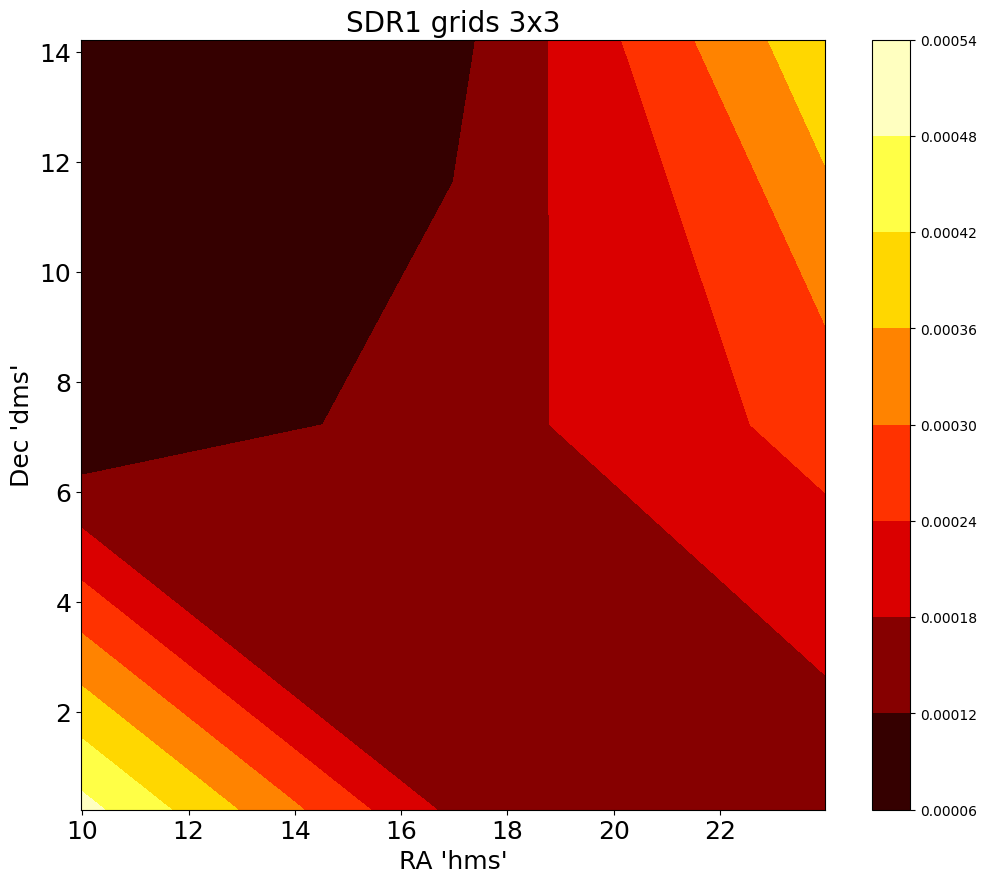

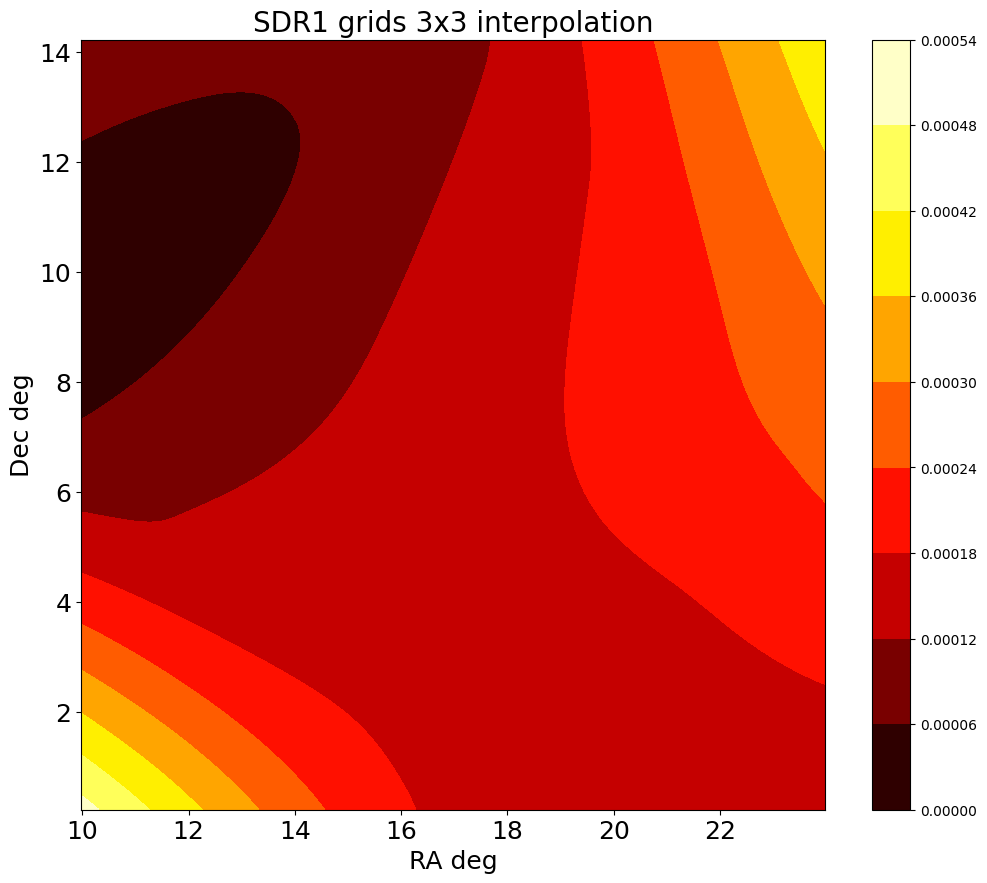

In [17]:
# Flatten the coordinates and values into 1D arrays.
x = np.array(sdr1_ra)
y = np.array(sdr1_dec)
z = np.array(sdr1_grid9_value)
#z = np.array(total_avg)

# Use the meshgrid function to convert the coordinates into a two-dimensional grid.
X, Y = np.meshgrid(np.unique(x), np.unique(y))

plt.figure(figsize=(12,10))
plt.title("SDR1 grids 3x3",fontsize=20)
# using contourf to plot counter figure
plt.contourf(X, Y, z.reshape(len(np.unique(x)), len(np.unique(y))), cmap='hot')
plt.colorbar()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA 'hms'",fontsize = 18)
plt.ylabel("Dec 'dms'",fontsize = 18)
#plt.savefig("grids9_SDR1.png")
plt.show()

# interpolation
xi = np.linspace(min(sdr1_ra), max(sdr1_ra), 100)
yi = np.linspace(min(sdr1_dec), max(sdr1_dec), 100)
zi = griddata((sdr1_ra, sdr1_dec), sdr1_grid9_value, (xi[None,:], yi[:,None]), method='cubic')

plt.figure(figsize=(12,10))
plt.title("SDR1 grids 3x3 interpolation",fontsize=20)
plt.contourf(xi, yi, zi, cmap='hot')
plt.colorbar()
#plt.scatter(sdr1_ra, sdr1_dec, c=grid9_value, cmap='jet')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)
#plt.savefig("grids9_inp_SDR1.png")
plt.show()

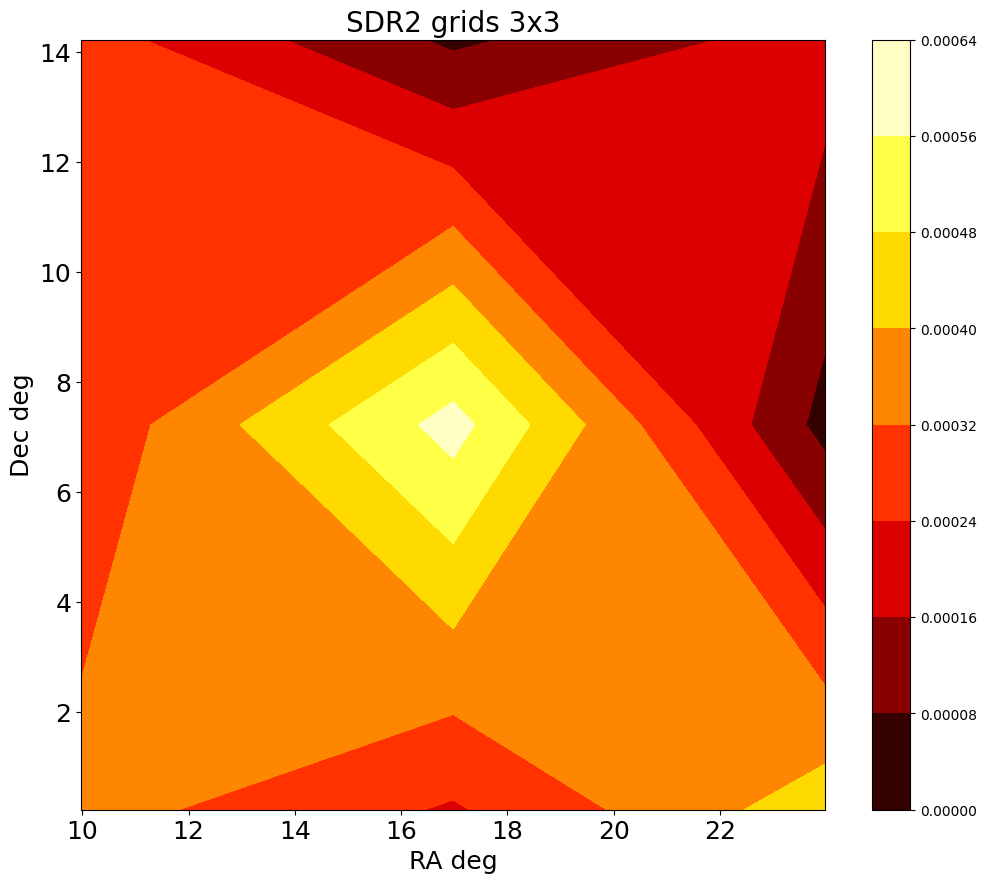

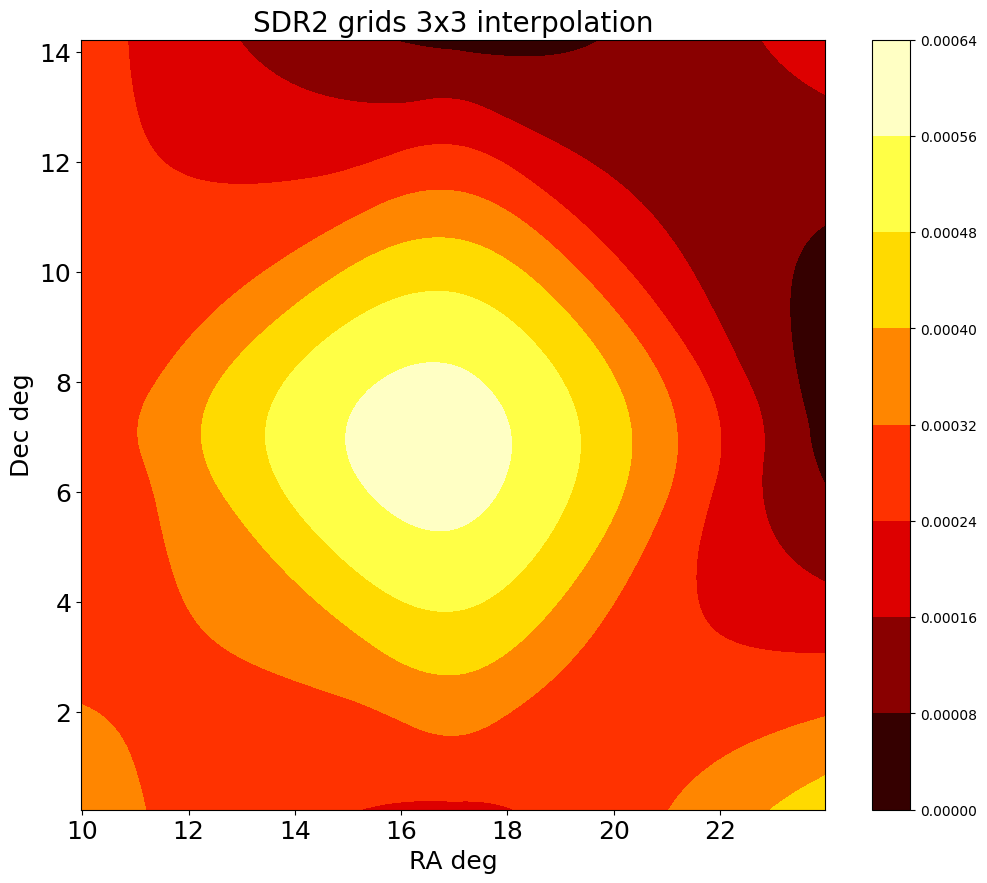

In [18]:
x = np.array(sdr2_ra)
y = np.array(sdr2_dec)
z = np.array(sdr2_grid9_value)
#z = np.array(total_avg)

X, Y = np.meshgrid(np.unique(x), np.unique(y))

fig, ax = plt.subplots(figsize=(12,10))
plt.title("SDR2 grids 3x3",fontsize=20)

im = ax.contourf(X, Y, z.reshape(len(np.unique(x)), len(np.unique(y))), cmap='hot')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)

# create a circule as a sun
center = (17.009, 7.226) # center position
radius = 0.5 # 半径
circle = patches.Circle(center, radius, edgecolor='r', facecolor='none')
# add the sun
#ax.add_patch(circle)
plt.colorbar(im)

#plt.savefig("grids9_SDR2.png")
plt.show()

xi = np.linspace(min(sdr2_ra), max(sdr2_ra), 100)
yi = np.linspace(min(sdr2_dec), max(sdr2_dec), 100)
zi = griddata((sdr2_ra, sdr2_dec), sdr2_grid9_value, (xi[None,:], yi[:,None]), method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
plt.title("SDR2 grids 3x3 interpolation",fontsize=20)
im = ax.contourf(xi, yi, zi, cmap='hot')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)

center = (17.009, 7.226)
radius = 0.5 
circle = patches.Circle(center, radius, edgecolor='r', facecolor='none')
#ax.add_patch(circle)
plt.colorbar(im)

#plt.savefig("grids9_inp_SDR2.png")
plt.show()


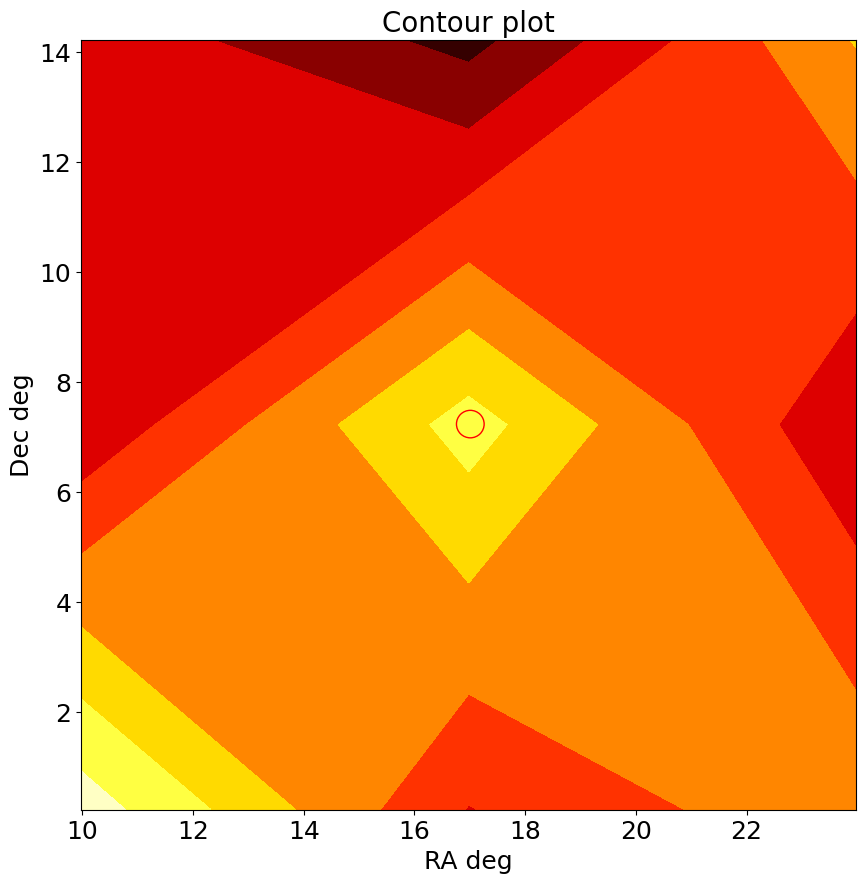

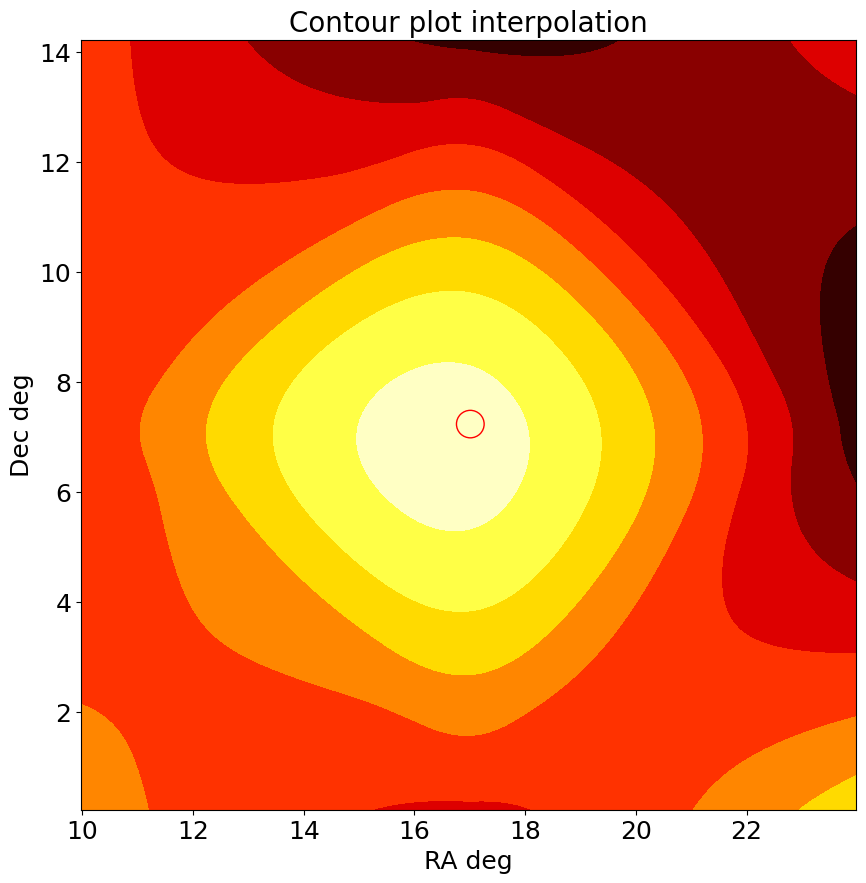

In [19]:

x = np.array(sdr2_ra)
y = np.array(sdr2_dec)
z = total_avg
#z = np.array(total_avg)


X, Y = np.meshgrid(np.unique(x), np.unique(y))

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Contour plot",fontsize=20)

im = ax.contourf(X, Y, z.reshape(len(np.unique(x)), len(np.unique(y))),cmap='hot')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)

center = (17.009, 7.226) 
radius = 0.25 
circle = patches.Circle(center, radius, edgecolor='r', facecolor='none')

ax.add_patch(circle)
#plt.colorbar(im)

#plt.savefig("sun_contour.png")
plt.show()


xi = np.linspace(min(sdr2_ra), max(sdr2_ra), 100)
yi = np.linspace(min(sdr2_dec), max(sdr2_dec), 100)
zi = griddata((sdr2_ra, sdr2_dec), sdr2_grid9_value, (xi[None,:], yi[:,None]), method='cubic')

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Contour plot interpolation",fontsize=20)

im = ax.contourf(xi, yi, zi, cmap='hot')
#plt.scatter(sdr1_ra, sdr1_dec, c=grid9_value, cmap='jet')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)


center = (17.009, 7.226)
radius = 0.25
circle = patches.Circle(center, radius, edgecolor='r', facecolor='none')

ax.add_patch(circle)
#plt.colorbar(im)
#plt.savefig("sun_contour_inp.png")
plt.show()

In [20]:
# grid data process 5x5
# When using 5x5 grid data, the order in which Python reads the files does not seem to be in accordance with the 
# record time, so manual reading is required. This issue is waiting to be fixed.

In [21]:
sdr1_ra = []
sdr1_dec = []
sdr2_ra = []
sdr2_dec = []
for i in np.arange(18,68,1):
    if sections[i][0:4] == 'SDR1':
        temp_ra = config.get(sections[i],options[-2])
        temp_dec = config.get(sections[i],options[-1])
        temp_deg = SkyCoord(ra=temp_ra,dec=temp_dec)
        sdr1_ra.append(temp_deg.ra.value)
        sdr1_dec.append(temp_deg.dec.value)
    else:
        temp_ra = config.get(sections[i],options[-2])
        temp_dec = config.get(sections[i],options[-1])
        temp_deg = SkyCoord(ra=temp_ra,dec=temp_dec)
        sdr2_ra.append(temp_deg.ra.value)
        sdr2_dec.append(temp_deg.dec.value)

obs_time = int(config.get(sections[i],options[3]))
sdr1_grid25 = grid_data('/home/jiomer/Documents/observation/data/grid/grid25/sdr1/',25,obs_time,sdr1_bl)
sdr2_grid25 = grid_data('/home/jiomer/Documents/observation/data/grid/grid25/sdr2/',25,obs_time,sdr2_bl)

In [22]:
sdr1_grid25_value = []
for i in range(len(sdr1_grid25)):
    sdr1_grid25_value.append( np.sum(sdr1_grid25[i]/len(sdr1_grid25[i])) )

sdr2_grid25_value = []
for i in range(len(sdr1_grid25)):
    sdr2_grid25_value.append( np.sum(sdr2_grid25[i]/len(sdr2_grid25[i])) )

total_avg = ( np.array(sdr1_grid25_value) + np.array(sdr2_grid25_value) )/2

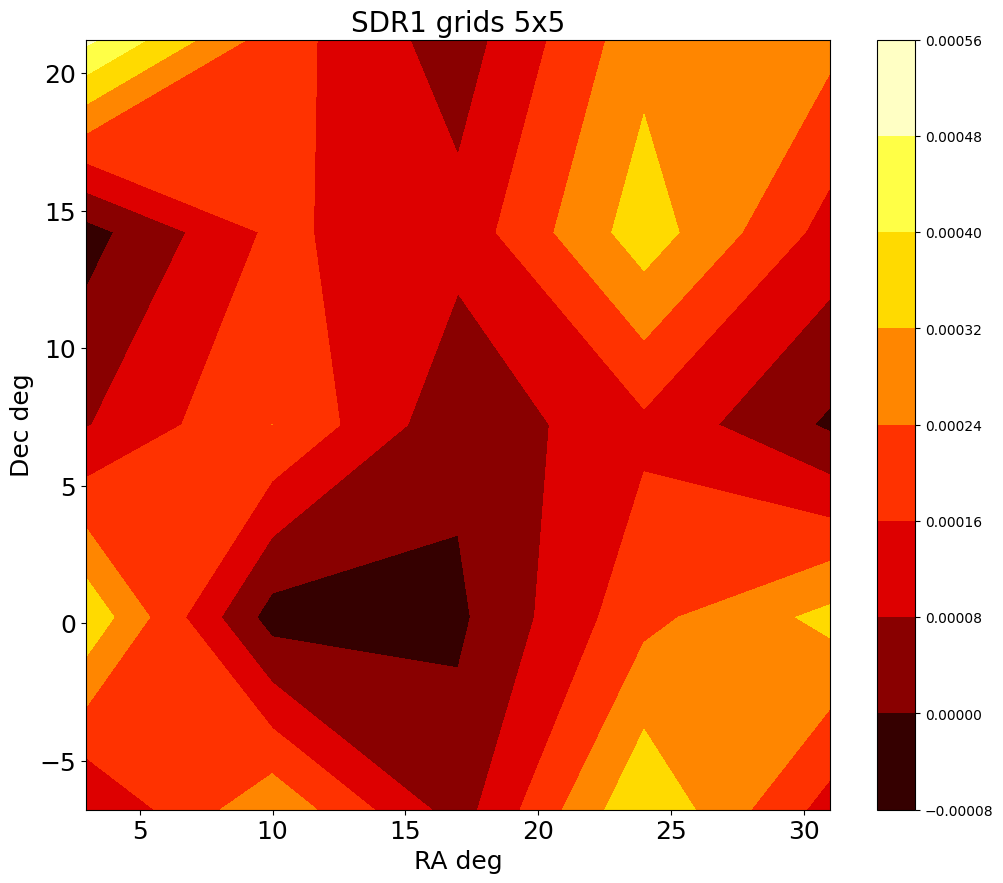

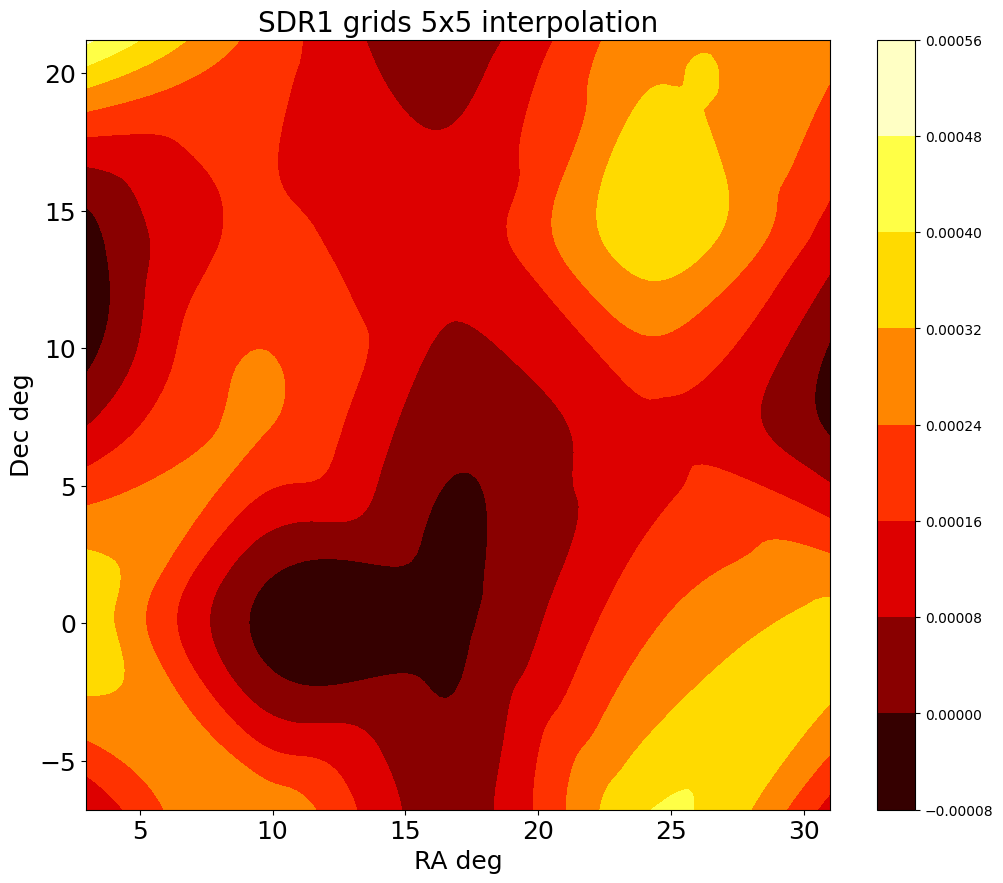

In [23]:

x = np.array(sdr1_ra)
y = np.array(sdr1_dec)
z = np.array(sdr1_grid25_value)
#z = np.array(total_avg)

X, Y = np.meshgrid(np.unique(x), np.unique(y))

plt.figure(figsize=(12,10))
plt.title("SDR1 grids 5x5",fontsize=20)

plt.contourf(X, Y, z.reshape(len(np.unique(x)), len(np.unique(y))), cmap='hot')
plt.colorbar()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)
plt.savefig("grids25_SDR1.png")

plt.show()


xi = np.linspace(min(sdr1_ra), max(sdr1_ra), 100)
yi = np.linspace(min(sdr1_dec), max(sdr1_dec), 100)
zi = griddata((sdr1_ra, sdr1_dec), sdr1_grid25_value, (xi[None,:], yi[:,None]), method='cubic')

plt.figure(figsize=(12,10))
plt.title("SDR1 grids 5x5 interpolation",fontsize=20)

plt.contourf(xi, yi, zi, cmap='hot')
plt.colorbar()
#plt.scatter(sdr1_ra, sdr1_dec, c=grid9_value, cmap='jet')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)
plt.savefig("grids25_SDR1_inp.png")
plt.show()

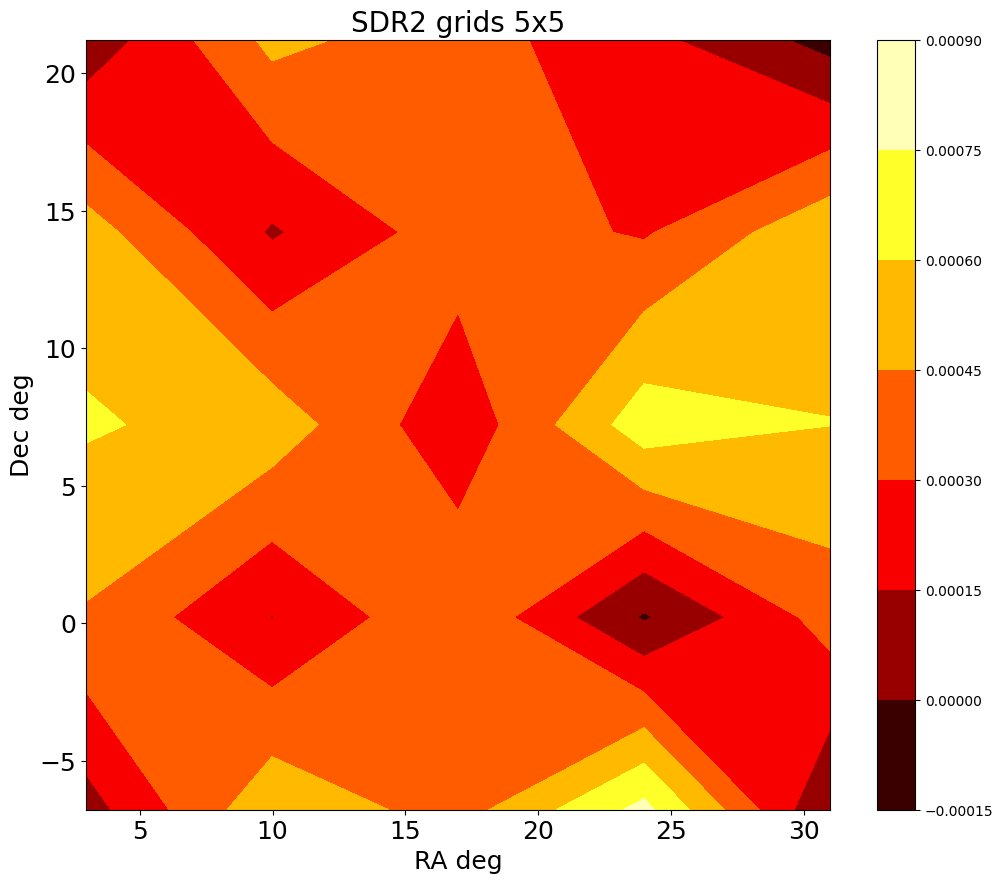

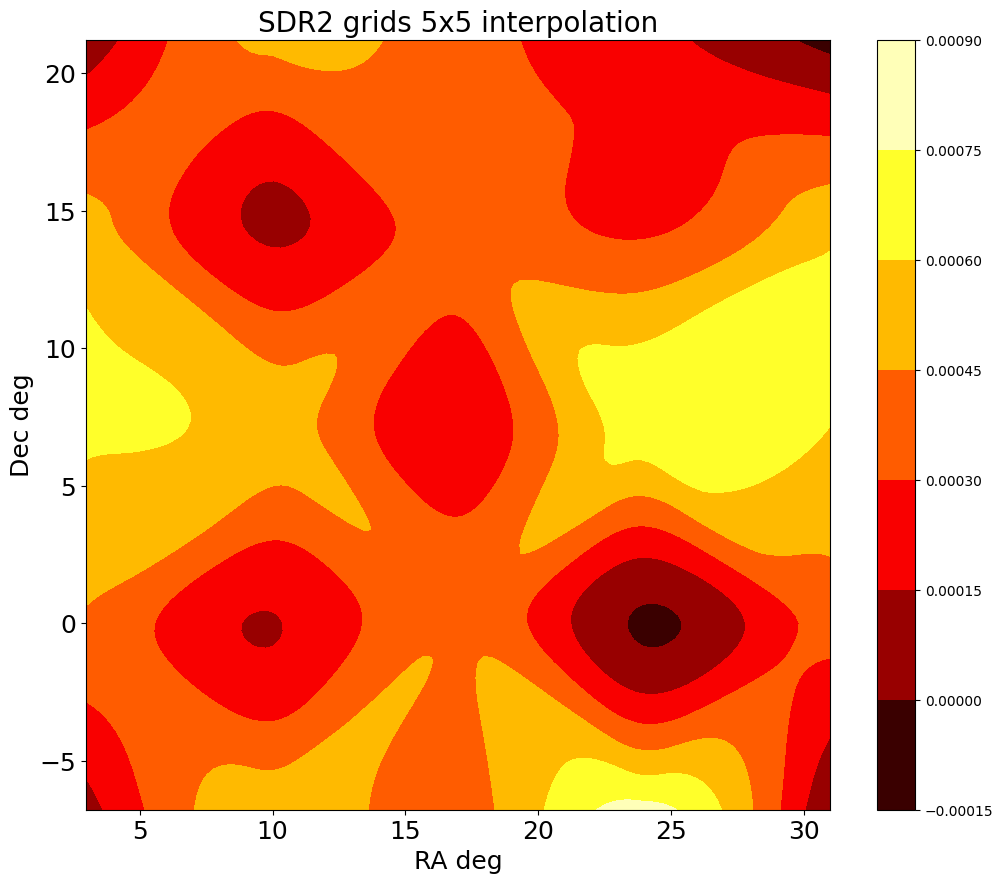

In [24]:

x = np.array(sdr2_ra)
y = np.array(sdr2_dec)
z = np.array(sdr2_grid25_value)
#z = np.array(total_avg)


X, Y = np.meshgrid(np.unique(x), np.unique(y))

plt.figure(figsize=(12,10))
plt.title("SDR2 grids 5x5",fontsize=20)

plt.contourf(X, Y, z.reshape(len(np.unique(x)), len(np.unique(y))), cmap='hot')
plt.colorbar()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)
plt.savefig("grids25_SDR2.png")

plt.show()


xi = np.linspace(min(sdr2_ra), max(sdr2_ra), 100)
yi = np.linspace(min(sdr2_dec), max(sdr2_dec), 100)
zi = griddata((sdr2_ra, sdr2_dec), sdr2_grid25_value, (xi[None,:], yi[:,None]), method='cubic')

plt.figure(figsize=(12,10))
plt.title("SDR2 grids 5x5 interpolation",fontsize=20)

plt.contourf(xi, yi, zi, cmap='hot')
plt.colorbar()
#plt.scatter(sdr1_ra, sdr1_dec, c=grid9_value, cmap='jet')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)
plt.savefig("grids25_SDR2_inp.png")
plt.show()

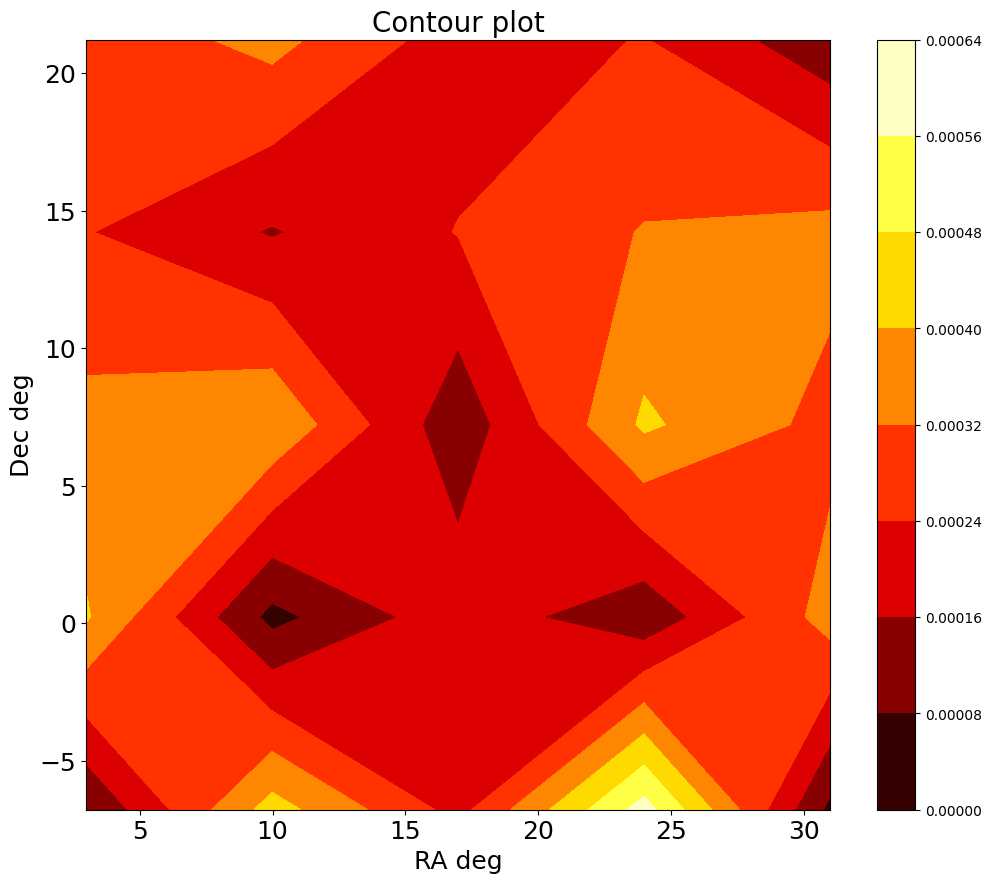

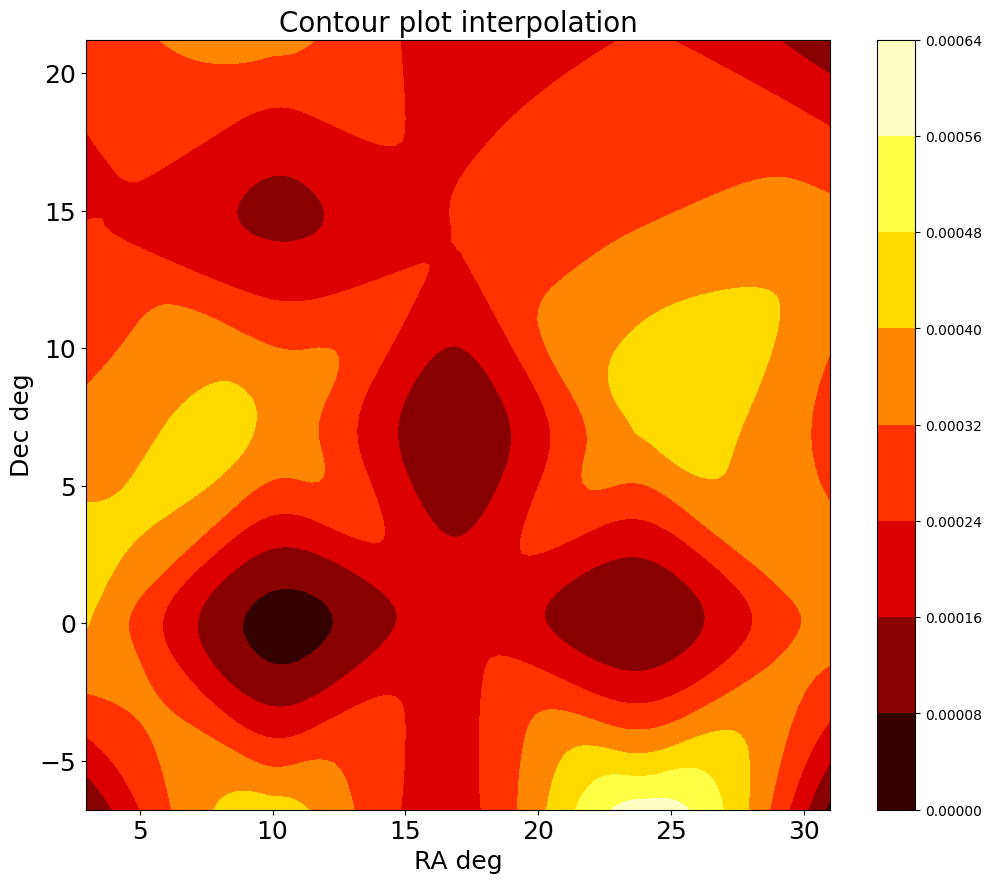

In [25]:

x = np.array(sdr2_ra)
y = np.array(sdr2_dec)
z = total_avg
#z = np.array(total_avg)


X, Y = np.meshgrid(np.unique(x), np.unique(y))

plt.figure(figsize=(12,10))
plt.title("Contour plot",fontsize=20)

plt.contourf(X, Y, z.reshape(len(np.unique(x)), len(np.unique(y))), cmap='hot')
plt.colorbar()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)

plt.savefig("sun_contour_5x5.png")

plt.show()


xi = np.linspace(min(sdr2_ra), max(sdr2_ra), 100)
yi = np.linspace(min(sdr2_dec), max(sdr2_dec), 100)
zi = griddata((sdr2_ra, sdr2_dec), total_avg, (xi[None,:], yi[:,None]), method='cubic')

plt.figure(figsize=(12,10))
plt.title("Contour plot interpolation",fontsize=20)

plt.contourf(xi, yi, zi, cmap='hot')
plt.colorbar()
#plt.scatter(sdr1_ra, sdr1_dec, c=grid9_value, cmap='jet')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)
plt.savefig("sun_contour_5x5_inp.png")
plt.show()

In [26]:
path = "/home/jiomer/Documents/observation/data/grid/grid25/sdr1/"

name = "2023-04-08-16:57:07_SDR1-grid_data.txt"
data1 = read_pathfile(path+name,30)
data1 = np.sum(data1)

name = "2023-04-08-16:57:53_SDR1-grid_data.txt"
data2 = read_pathfile(path+name,30)
data2 = np.sum(data2)

name = "2023-04-08-16:58:34_SDR1-grid_data.txt"
data3 = read_pathfile(path+name,30)
data3 = np.sum(data3)

name = "2023-04-08-16:59:16_SDR1-grid_data.txt"
data4 = read_pathfile(path+name,30)
data4 = np.sum(data4)

name = "2023-04-08-16:59:57_SDR1-grid_data.txt"
data5 = read_pathfile(path+name,30)
data5 = np.sum(data5)

name = "2023-04-08-17:00:43_SDR1-grid_data.txt"
data6 = read_pathfile(path+name,30)
data6 = np.sum(data6)

name = "2023-04-08-17:01:24_SDR1-grid_data.txt"
data7 = read_pathfile(path+name,30)
data7 = np.sum(data7)

name = "2023-04-08-17:02:06_SDR1-grid_data.txt"
data8 = read_pathfile(path+name,30)
data8 = np.sum(data8)

name = "2023-04-08-17:02:47_SDR1-grid_data.txt"
data9 = read_pathfile(path+name,30)
data9 = np.sum(data9)

name = "2023-04-08-17:03:33_SDR1-grid_data.txt"
data10 = read_pathfile(path+name,30)
data10 = np.sum(data10)

name = "2023-04-08-17:04:14_SDR1-grid_data.txt"
data11 = read_pathfile(path+name,30)
data11 = np.sum(data11)

name = "2023-04-08-17:04:56_SDR1-grid_data.txt"
data12 = read_pathfile(path+name,30)
data12 = np.sum(data12)

name = "2023-04-08-17:05:37_SDR1-grid_data.txt"
data13 = read_pathfile(path+name,30)
data13 = np.sum(data13)

name = "2023-04-08-17:06:18_SDR1-grid_data.txt"
data14 = read_pathfile(path+name,30)
data14 = np.sum(data14)

name = "2023-04-08-17:07:04_SDR1-grid_data.txt"
data15 = read_pathfile(path+name,30)
data15 = np.sum(data15)

name = "2023-04-08-17:07:46_SDR1-grid_data.txt"
data16 = read_pathfile(path+name,30)
data16 = np.sum(data16)

name = "2023-04-08-17:08:27_SDR1-grid_data.txt"
data17 = read_pathfile(path+name,30)
data17 = np.sum(data17)

name = "2023-04-08-17:09:08_SDR1-grid_data.txt"
data18 = read_pathfile(path+name,30)
data18 = np.sum(data18)

name = "2023-04-08-17:09:49_SDR1-grid_data.txt"
data19 = read_pathfile(path+name,30)
data19 = np.sum(data19)

name = "2023-04-08-17:10:31_SDR1-grid_data.txt"
data20 = read_pathfile(path+name,30)
data20 = np.sum(data20)

name = "2023-04-08-17:11:12_SDR1-grid_data.txt"
data21 = read_pathfile(path+name,30)
data21 = np.sum(data21)

name = "2023-04-08-17:11:53_SDR1-grid_data.txt"
data22 = read_pathfile(path+name,30)
data22 = np.sum(data22)

name = "2023-04-08-17:12:39_SDR1-grid_data.txt"
data23 = read_pathfile(path+name,30)
data23 = np.sum(data23)

name = "2023-04-08-17:13:20_SDR1-grid_data.txt"
data24 = read_pathfile(path+name,30)
data24 = np.sum(data24)

name = "2023-04-08-17:14:02_SDR1-grid_data.txt"
data25 = read_pathfile(path+name,30)
data25 = np.sum(data25)

datal1 = np.array([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,
data14,data15,data16,data17,data18,data19,data20,data21,data22,data23,data24,data25])/30

In [27]:
path = "/home/jiomer/Documents/observation/data/grid/grid25/sdr2/"

name = "2023-04-08-16:57:07_SDR2-grid_data.txt"
data1 = read_pathfile(path+name,30)
data1 = np.sum(data1)

name = "2023-04-08-16:57:53_SDR2-grid_data.txt"
data2 = read_pathfile(path+name,30)
data2 = np.sum(data2)

name = "2023-04-08-16:58:34_SDR2-grid_data.txt"
data3 = read_pathfile(path+name,30)
data3 = np.sum(data3)

name = "2023-04-08-16:59:16_SDR2-grid_data.txt"
data4 = read_pathfile(path+name,30)
data4 = np.sum(data4)

name = "2023-04-08-16:59:57_SDR2-grid_data.txt"
data5 = read_pathfile(path+name,30)
data5 = np.sum(data5)

name = "2023-04-08-17:00:43_SDR2-grid_data.txt"
data6 = read_pathfile(path+name,30)
data6 = np.sum(data6)

name = "2023-04-08-17:01:24_SDR2-grid_data.txt"
data7 = read_pathfile(path+name,30)
data7 = np.sum(data7)

name = "2023-04-08-17:02:06_SDR2-grid_data.txt"
data8 = read_pathfile(path+name,30)
data8 = np.sum(data8)

name = "2023-04-08-17:02:47_SDR2-grid_data.txt"
data9 = read_pathfile(path+name,30)
data9 = np.sum(data9)

name = "2023-04-08-17:03:33_SDR2-grid_data.txt"
data10 = read_pathfile(path+name,30)
data10 = np.sum(data10)

name = "2023-04-08-17:04:14_SDR2-grid_data.txt"
data11 = read_pathfile(path+name,30)
data11 = np.sum(data11)

name = "2023-04-08-17:04:56_SDR2-grid_data.txt"
data12 = read_pathfile(path+name,30)
data12 = np.sum(data12)

name = "2023-04-08-17:05:37_SDR2-grid_data.txt"
data13 = read_pathfile(path+name,30)
data13 = np.sum(data13)

name = "2023-04-08-17:06:18_SDR2-grid_data.txt"
data14 = read_pathfile(path+name,30)
data14 = np.sum(data14)

name = "2023-04-08-17:07:04_SDR2-grid_data.txt"
data15 = read_pathfile(path+name,30)
data15 = np.sum(data15)

name = "2023-04-08-17:07:46_SDR2-grid_data.txt"
data16 = read_pathfile(path+name,30)
data16 = np.sum(data16)

name = "2023-04-08-17:08:27_SDR2-grid_data.txt"
data17 = read_pathfile(path+name,30)
data17 = np.sum(data17)

name = "2023-04-08-17:09:08_SDR2-grid_data.txt"
data18 = read_pathfile(path+name,30)
data18 = np.sum(data18)

name = "2023-04-08-17:09:49_SDR2-grid_data.txt"
data19 = read_pathfile(path+name,30)
data19 = np.sum(data19)

name = "2023-04-08-17:10:31_SDR2-grid_data.txt"
data20 = read_pathfile(path+name,30)
data20 = np.sum(data20)

name = "2023-04-08-17:11:12_SDR2-grid_data.txt"
data21 = read_pathfile(path+name,30)
data21 = np.sum(data21)

name = "2023-04-08-17:11:53_SDR2-grid_data.txt"
data22 = read_pathfile(path+name,30)
data22 = np.sum(data22)

name = "2023-04-08-17:12:39_SDR2-grid_data.txt"
data23 = read_pathfile(path+name,30)
data23 = np.sum(data23)

name = "2023-04-08-17:13:20_SDR2-grid_data.txt"
data24 = read_pathfile(path+name,30)
data24 = np.sum(data24)

name = "2023-04-08-17:14:02_SDR2-grid_data.txt"
data25 = read_pathfile(path+name,30)
data25 = np.sum(data25)

datal2 = np.array([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,
data14,data15,data16,data17,data18,data19,data20,data21,data22,data23,data24,data25])/30

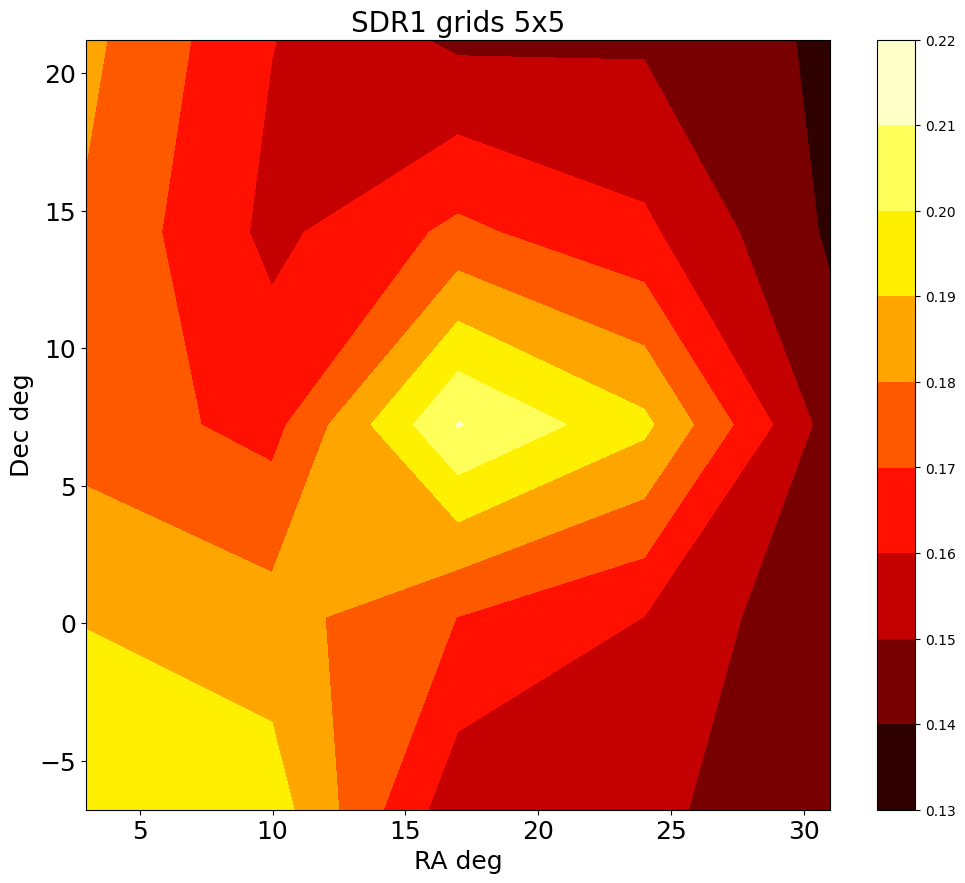

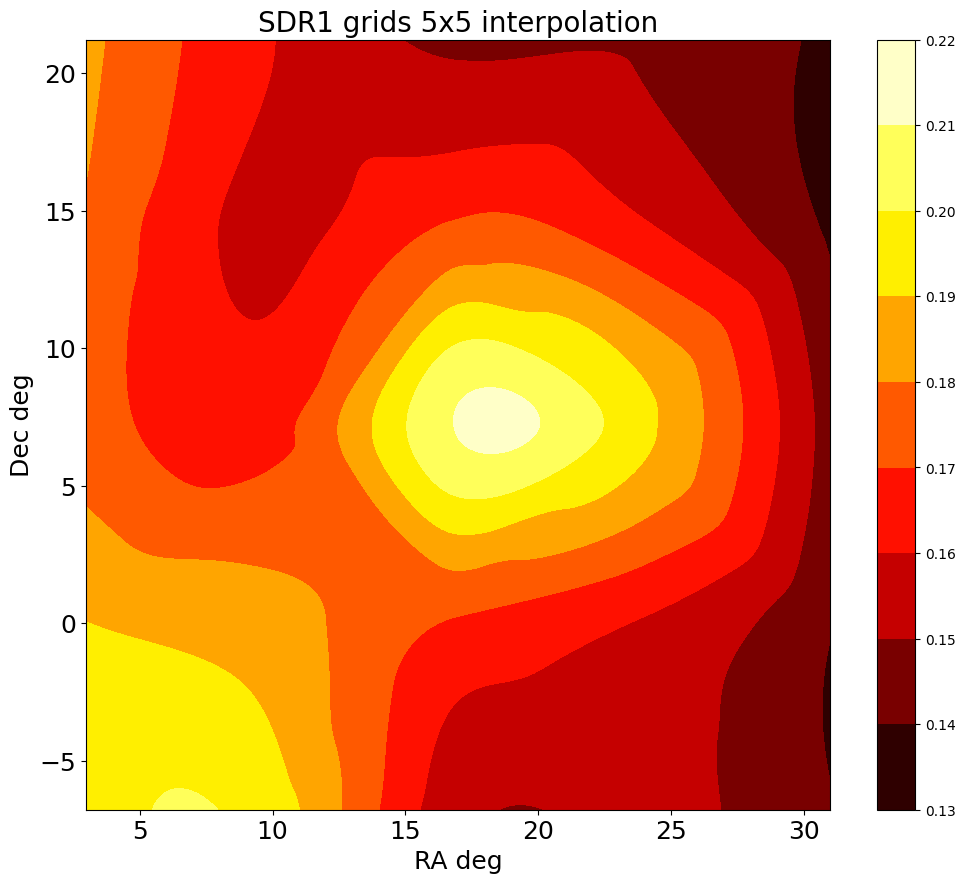

In [28]:

x = np.array(sdr2_ra)
y = np.array(sdr2_dec)
z = np.array(datal1)
#z = np.array(total_avg)


X, Y = np.meshgrid(np.unique(x), np.unique(y))

plt.figure(figsize=(12,10))
plt.title("SDR1 grids 5x5",fontsize=20)

plt.contourf(X, Y, z.reshape(len(np.unique(x)), len(np.unique(y))), cmap='hot')
plt.colorbar()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)
#plt.savefig("grids25_SDR2.png")

plt.show()

# 插值
xi = np.linspace(min(sdr2_ra), max(sdr2_ra), 300)
yi = np.linspace(min(sdr2_dec), max(sdr2_dec), 300)
zi = griddata((sdr2_ra, sdr2_dec), datal1, (xi[None,:], yi[:,None]), method='cubic')

plt.figure(figsize=(12,10))
plt.title("SDR1 grids 5x5 interpolation",fontsize=20)
# 绘制contour图
plt.contourf(xi, yi, zi, cmap='hot')
plt.colorbar()
#plt.scatter(sdr1_ra, sdr1_dec, c=grid9_value, cmap='jet')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)
#plt.savefig("grids25_SDR2_inp.png")
plt.show()

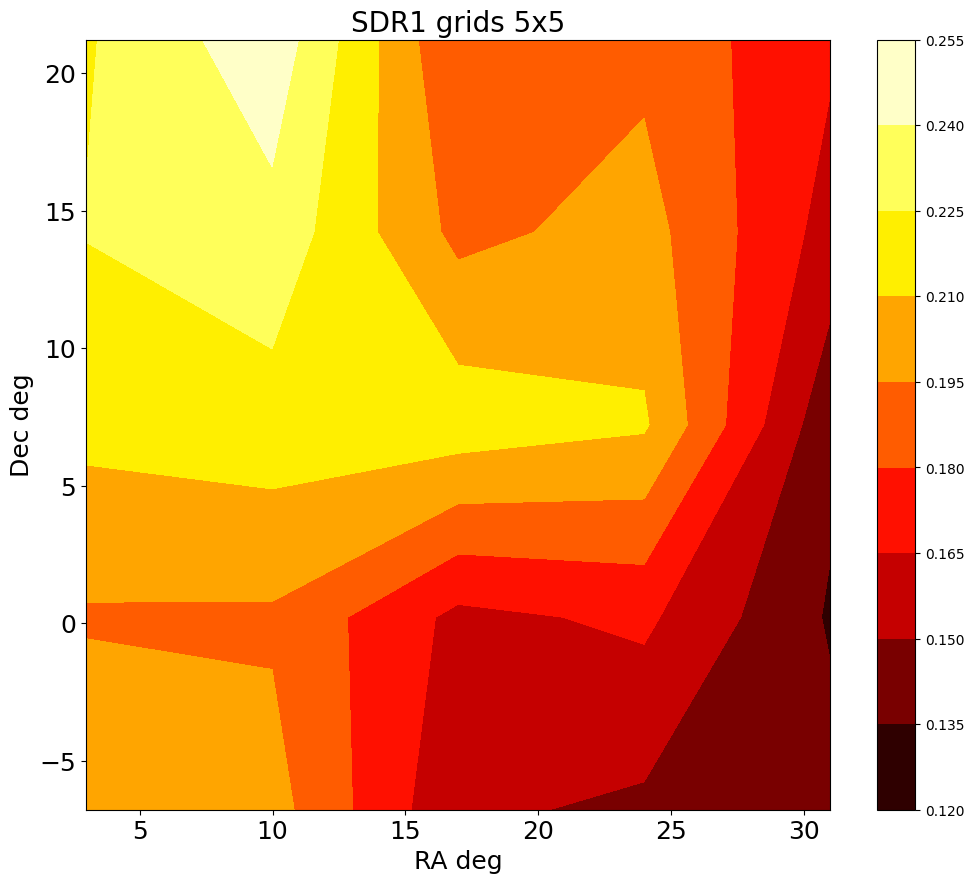

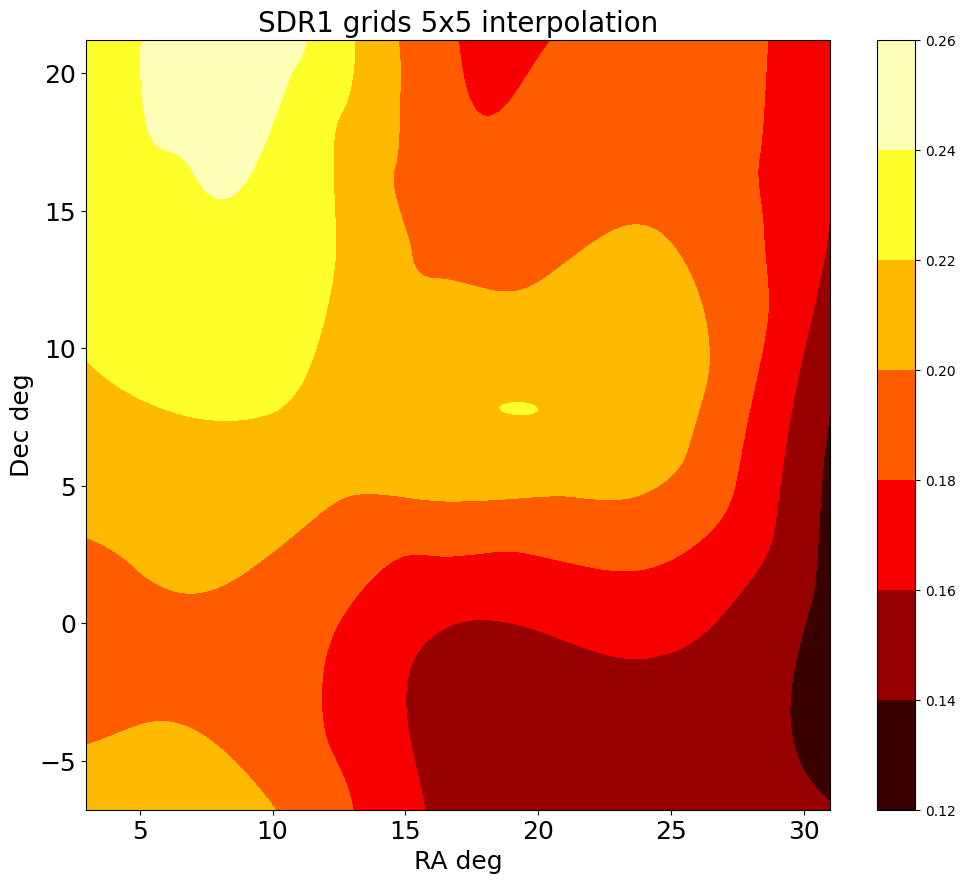

In [29]:
# 将坐标和数值大小转换为一维数组
x = np.array(sdr2_ra)
y = np.array(sdr2_dec)
z = np.array(datal2)
#z = np.array(total_avg)

# 使用meshgrid函数将坐标转换为二维网格
X, Y = np.meshgrid(np.unique(x), np.unique(y))

plt.figure(figsize=(12,10))
plt.title("SDR1 grids 5x5",fontsize=20)
# 使用contourf函数绘制counter图
plt.contourf(X, Y, z.reshape(len(np.unique(x)), len(np.unique(y))), cmap='hot')
plt.colorbar()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)
#plt.savefig("grids25_SDR2.png")
# 显示图像
plt.show()

# 插值
xi = np.linspace(min(sdr2_ra), max(sdr2_ra), 300)
yi = np.linspace(min(sdr2_dec), max(sdr2_dec), 300)
zi = griddata((sdr2_ra, sdr2_dec), datal2, (xi[None,:], yi[:,None]), method='cubic')

plt.figure(figsize=(12,10))
plt.title("SDR1 grids 5x5 interpolation",fontsize=20)
# 绘制contour图
plt.contourf(xi, yi, zi, cmap='hot')
plt.colorbar()
#plt.scatter(sdr1_ra, sdr1_dec, c=grid9_value, cmap='jet')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)
#plt.savefig("grids25_SDR2_inp.png")
plt.show()

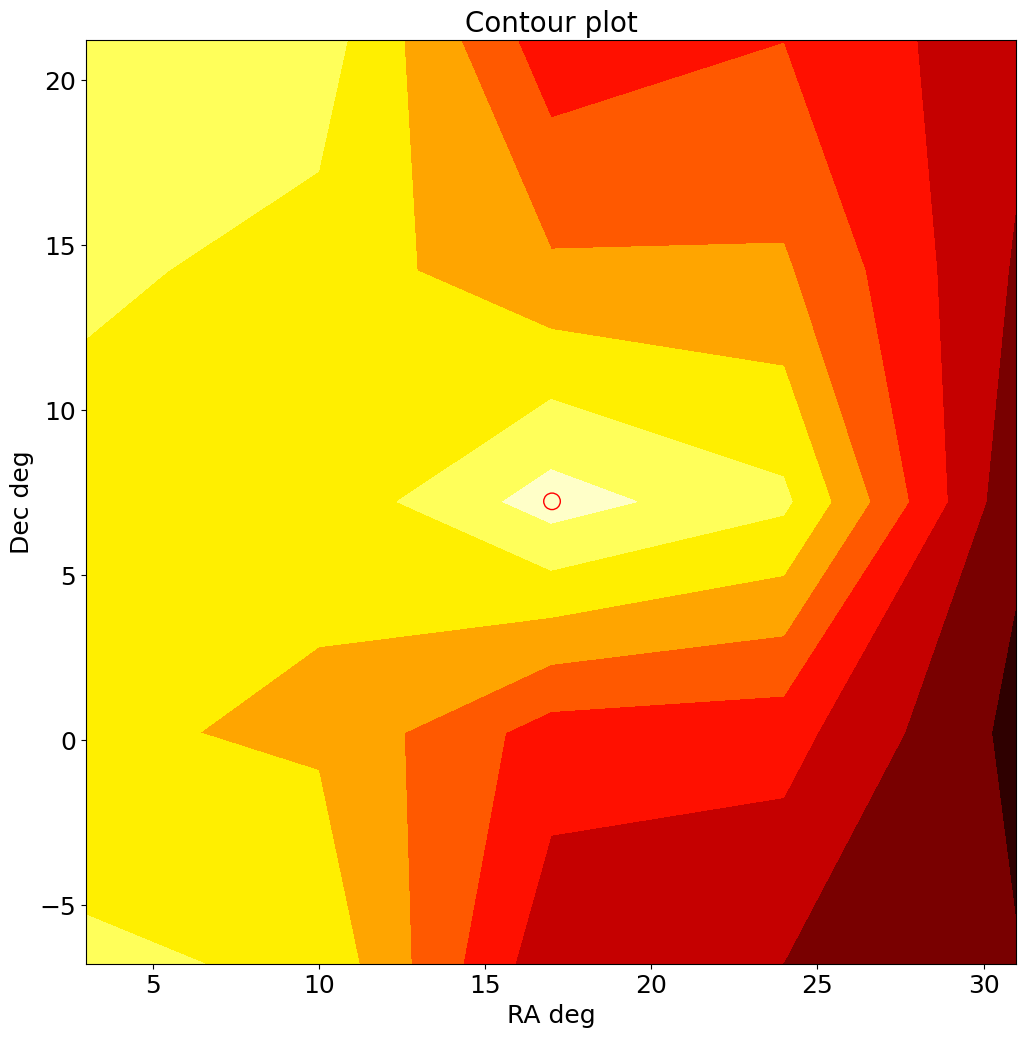

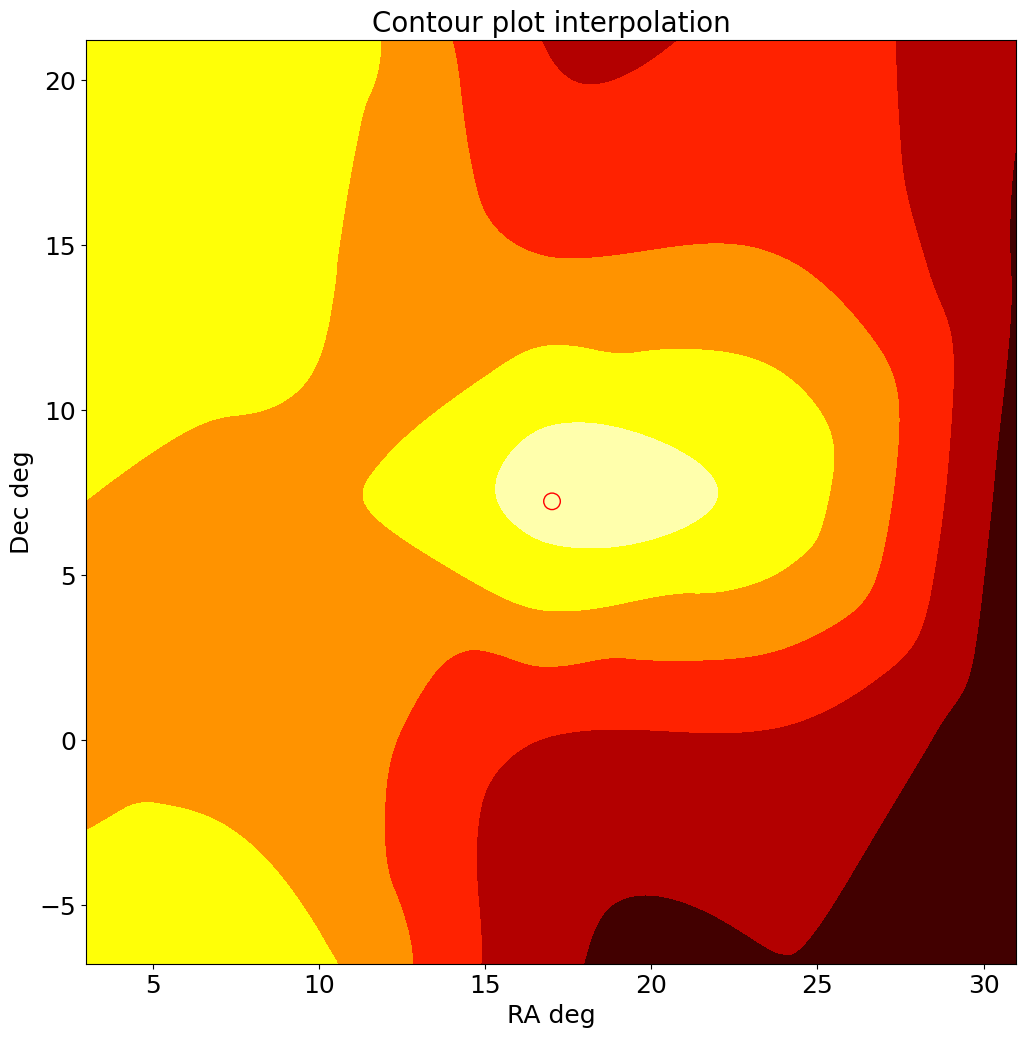

In [33]:
# 将坐标和数值大小转换为一维数组
x = np.array(sdr2_ra)
y = np.array(sdr2_dec)
z = (datal1+datal2)/2
#z = np.array(total_avg)

# 使用meshgrid函数将坐标转换为二维网格
X, Y = np.meshgrid(np.unique(x), np.unique(y))

fig, ax = plt.subplots(figsize=(12,12))
plt.title("Contour plot",fontsize=20)
# 使用contourf函数绘制counter图
im = ax.contourf(X, Y, z.reshape(len(np.unique(x)), len(np.unique(y))),cmap='hot')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)
# 创建圆形对象
center = (17.009, 7.226) # 圆心坐标
radius = 0.25 # 半径
circle = patches.Circle(center, radius, edgecolor='r', facecolor='none')
# 添加圆形对象到坐标轴上
ax.add_patch(circle)
#plt.colorbar(im)
# 显示图像
#plt.savefig("sun_contour.png")
plt.show()

# 插值
xi = np.linspace(min(sdr2_ra), max(sdr2_ra), 300)
yi = np.linspace(min(sdr2_dec), max(sdr2_dec), 300)
zi = griddata((sdr2_ra, sdr2_dec), (datal1+datal2)/2, (xi[None,:], yi[:,None]), method='cubic')

fig, ax = plt.subplots(figsize=(12,12))
plt.title("Contour plot interpolation",fontsize=20)
# 绘制contour图
im = ax.contourf(xi, yi, zi, cmap='hot')
#plt.scatter(sdr1_ra, sdr1_dec, c=grid9_value, cmap='jet')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("RA deg",fontsize = 18)
plt.ylabel("Dec deg",fontsize = 18)

# 创建圆形对象
center = (17.009, 7.226) # 圆心坐标
radius = 0.25 # 半径
circle = patches.Circle(center, radius, edgecolor='r', facecolor='none')
# 添加圆形对象到坐标轴上
ax.add_patch(circle)
#plt.colorbar(im)
#plt.savefig("sun_contour_inp.png")
plt.show()